In [1]:
from atl_module import GebcoUpscaler
import pandas as pd

In [2]:
%cd ..

/mnt/c/Users/XCB/OneDrive - Van Oord/Documents/thesis/code


In [3]:
sitename = 'keys2'
site = GebcoUpscaler(sitename,'../data/test_sites/keys2/in-situ-DEM/truth.vrt')

In [4]:
# site.recalc_tracklines_gdf()

In [ ]:
# site.find_bathy_from_icesat(
#     window=200,
#     threshold_val=0.0,
#     req_perc_hconf=60,
#     window_meters=None,
#     min_photons=None,
#     min_kde=0.0
# )

[I 220803 14:29:02 core:126] site: Keys2 - Starting bathymetry signal finding with parameters: {'window_size_photons': 100, 'threshhold value': 0.0, 'Required percentage high confidence ocean photons': 60, 'minimum photons in distance window': None, 'window_horizontal': None, 'Minimum KDE to be considered': 0.0}


In [6]:
# site.subset_gebco(50)

In [7]:
# site.add_truth_data()

In [8]:
# site.lidar_error()

[I 220803 14:17:29 core:256] Keys2: Saved lidar error plot to ../document/figures/Keys2_lidar_estimated_vs_truth.jpg


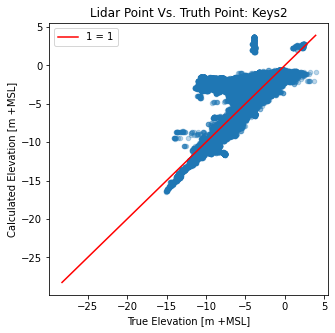

In [9]:
site.plot_lidar_error()

In [10]:
# site.kriging(npts=1000,kr_model='ok',samplemethod='dart')

In [11]:
date_indexed_tracklines  = site.tracklines.assign(date = pd.to_datetime(site.tracklines.date).dt.date).reset_index().set_index(['date','beam'])
df = site.bathy_pts_gdf.eval('error=z_kde-true_elevation').eval('error_abs=abs(z_kde-true_elevation)').groupby([pd.to_datetime(site.bathy_pts_gdf.rename(columns={'delta_time':'date'}).date).dt.date,'beam']).mean().sort_values('error',ascending=False)
# 
df = df.merge(date_indexed_tracklines,how='left',left_index=True,right_index=True)


<AxesSubplot:xlabel='error', ylabel='sea_level_interp'>

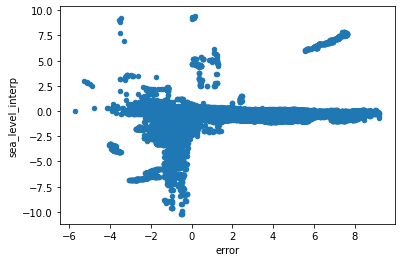

In [12]:
site.bathy_pts_gdf.eval('error=z_kde-true_elevation').plot.scatter(x='error',y='sea_level_interp')

<AxesSubplot:xlabel='error', ylabel='kde_val'>

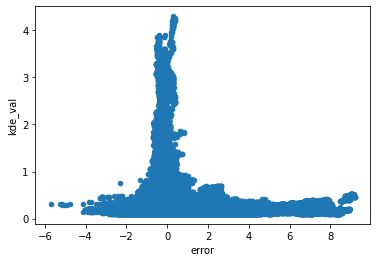

In [13]:
site.bathy_pts_gdf.eval('error=(z_kde-true_elevation)').plot.scatter(x='error',y='kde_val')

<AxesSubplot:xlabel='error', ylabel='tide_ocean_corr'>

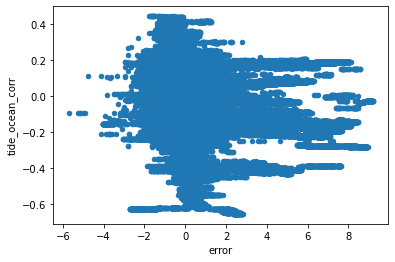

In [14]:
site.bathy_pts_gdf.eval('error=(z_kde-true_elevation)').plot.scatter(x='error',y='tide_ocean_corr')

In [15]:
site.bathy_pts_gdf.eval('error=z_kde-true_elevation').corr()['error'].sort_values()

true_elevation     -0.255977
tide_ocean_corr    -0.219545
X                  -0.164266
easting_raw        -0.164107
gebco_elev         -0.072988
kde_val            -0.036757
sea_level_interp   -0.018116
Y                  -0.014076
northing_raw       -0.012200
easting_corr       -0.011505
dac_corr           -0.003225
northing_corr       0.000950
geof2m_corr         0.014146
oc_sig_conf         0.014741
p_vec_az            0.049880
Z_refr              0.053132
Z_geoid             0.053438
p_vec_elev          0.053883
Z_ellip             0.055396
land_sig_conf       0.080758
oc_hconf_perc       0.100416
geoid_corr          0.152785
z_kde               0.160190
error               1.000000
Name: error, dtype: float64

In [16]:
dac_tide = site.bathy_pts_gdf.z_kde  - site.bathy_pts_gdf.dac_corr  + site.bathy_pts_gdf.tide_ocean_corr
site.bathy_pts_gdf.assign(dac_tide=dac_tide).eval('error=(dac_tide-true_elevation)**2').error.mean()**(0.5)

0.8486426537518632

In [18]:
df.sort_values('error_abs',ascending=False)

X          Y    Z_ellip    Z_geoid  geoid_corr  \
date       beam                                                           
2020-07-14 gt1r -80.895573  24.722508 -31.292944  -6.834957  -24.452964   
2018-12-22 gt1l -81.893076  24.710446 -26.499599  -3.392589  -23.234321   
           gt3r -81.957789  24.706692 -25.970607  -2.756989  -23.327678   
2021-02-06 gt2l -81.980078  24.699035 -29.475357  -5.864214  -23.378325   
2018-12-22 gt2l -81.926819  24.691677 -26.336542  -3.144299  -23.292122   
...                    ...        ...        ...        ...         ...   
2020-01-10 gt3l -82.224570  24.551174 -28.003682  -4.662529  -23.589184   
2020-02-08 gt1r -82.042487  24.690455 -28.552890  -5.092743  -23.453811   
2021-03-07 gt3r -81.670406  24.534826 -34.205129 -10.441596  -23.592940   
2021-11-05 gt1l -82.015289  24.879860 -32.093907  -9.006586  -23.399393   
           gt2l -81.965236  24.712415 -56.336053 -33.251236  -23.333626   

                 tide_ocean_corr  geof2m_corr  oc_sig_conf  land_sig_conf  \
date       beam                                                             
2020-07-14 gt1r        -0.066417     0.061394     0.911765       3.029412   
2018-12-22 gt1l         0.065856     0.061455     3.380178       3.906805   
           gt3r         0.052586     0.061474     3.472722       3.985178   
2021-02-06 gt2l        -0.294331     0.061514     1.290117       3.723092   
2018-12-22 gt2l         0.038329     0.061551     3.378664       3.910903   
...                          ...          ...          ...            ...   
2020-01-10 gt3l         0.185764     0.062267     3.121339       3.576360   
2020-02-08 gt1r        -0.067893     0.061558     0.000000       0.000000   
2021-03-07 gt3r        -0.232943     0.062349     0.800000       3.333333   
2021-11-05 gt1l         0.251482     0.060590     0.000000       0.000000   
           gt2l         0.187363     0.061446     0.000000       0.000000   

                 p_vec_az  ...    easting_raw  northing_raw  true_elevation  \
date       beam            ...                                                
2020-07-14 gt1r -2.582787  ...  510561.216340  2.734226e+06      -10.370142   
2018-12-22 gt1l -1.554465  ...  409667.458064  2.733181e+06       -9.118853   
           gt3r  2.424822  ...  403118.571610  2.732809e+06       -7.171762   
2021-02-06 gt2l -1.725204  ...  400858.374543  2.731977e+06       -7.005685   
2018-12-22 gt2l -1.776713  ...  406240.146183  2.731125e+06       -5.244969   
...                   ...  ...            ...           ...             ...   
2020-01-10 gt3l -1.761228  ...  375977.700143  2.715802e+06             NaN   
2020-02-08 gt1r -1.203077  ...  394537.063449  2.731074e+06             NaN   
2021-03-07 gt3r -1.535325  ...  432096.020819  2.713606e+06             NaN   
2021-11-05 gt1l -1.716404  ...  397444.548399  2.752027e+06             NaN   
           gt2l -1.712592  ...  402369.773906  2.733448e+06             NaN   

                    error  error_abs  index  \
date       beam                               
2020-07-14 gt1r  8.201772   8.201772    389   
2018-12-22 gt1l  7.500725   7.500725     40   
           gt3r  5.592450   5.611273     45   
2021-02-06 gt2l  4.790812   4.813873    518   
2018-12-22 gt2l  3.551082   3.551082     42   
...                   ...        ...    ...   
2020-01-10 gt3l       NaN        NaN    272   
2020-02-08 gt1r       NaN        NaN    293   
2021-03-07 gt3r       NaN        NaN    539   
2021-11-05 gt1l       NaN        NaN    688   
           gt2l       NaN        NaN    690   

                                                           file  \
date       beam                                                   
2020-07-14 gt1r  processed_ATL03_20200714023110_02860807_005_01   
2018-12-22 gt1l  processed_ATL03_20181222054803_12920107_005_01   
           gt3r  processed_ATL03_20181222054803_12920107_005_01   
2021-02-06 gt2l  processed_ATL03_20210206042934_06751001_005_01   
2018-

In [5]:
site.bathy_pts_gdf = site.bathy_pts_gdf[site.bathy_pts_gdf.kde_val>1]